<a href="https://colab.research.google.com/github/harshareddy2608/Pytorch_learning/blob/main/Day_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Neural network classification**

In [7]:
from sklearn.datasets import make_circles


# Making 2000 samples
n_samples = 2000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [8]:
print(f"First 10 X features:\n{X[:10]}")
print(f"\nFirst 10 y labels:\n{y[:10]}")

First 10 X features:
[[ 0.47109875 -0.58158579]
 [-0.61696058  0.80818956]
 [-0.3999557   0.70796779]
 [ 0.82938523 -0.60057314]
 [-0.16419138  0.76128858]
 [-0.16190608  0.77881744]
 [ 0.9701     -0.35427244]
 [-0.10573729 -0.80478381]
 [ 0.90810557  0.45945033]
 [-0.34274852  0.73021408]]

First 10 y labels:
[1 0 1 0 1 1 0 1 0 1]


In [9]:
# Creating DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(20)

,X1,X2,label
0,0.471099,-0.581586,1
1,-0.616961,0.808190,0
2,-0.399956,0.707968,1
3,0.829385,-0.600573,0
4,-0.164191,0.761289,1
5,-0.161906,0.778817,1
6,0.970100,-0.354272,0
7,-0.105737,-0.804784,1
8,0.908106,0.459450,0
9,-0.342749,0.730214,1


In [10]:
# Checking different labels
circles.label.value_counts()

1    1000
0    1000
Name: label, dtype: int64

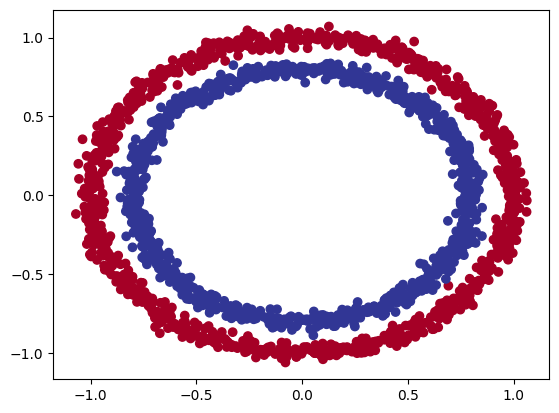

In [11]:
# Visualizing with a plot (scatterplots)
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

### **Shapes of input and output**

In [12]:
# Checking the shapes of  features and labels
X.shape, y.shape

((2000, 2), (2000,))

In [13]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [ 0.47109875 -0.58158579] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


Turning data into tensors and creating train and test splits

In [14]:
#  First Turn data into tensors
# Otherwise this causes issues with computations later on
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
X[:5], y[:5]

(tensor([[ 0.4711, -0.5816],
         [-0.6170,  0.8082],
         [-0.4000,  0.7080],
         [ 0.8294, -0.6006],
         [-0.1642,  0.7613]]),
 tensor([1., 0., 1., 0., 1.]))

In [15]:
# Spliting the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(1600, 400, 1600, 400)

  we've now got 1600 training samples and 400 testing samples.

### **Building a model**

In [17]:
# Standard PyTorch imports
import torch
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
device# Standard PyTorch imports
import torch
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [18]:
# 1. Now we need to construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)

    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
# Club the CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
# creating the  predictions with the model
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 400, Shape: torch.Size([400, 1])
Length of test samples: 400, Shape: torch.Size([400])

First 10 predictions:
tensor([[-0.3182],
        [-0.3296],
        [-0.2411],
        [-0.5534],
        [-0.8152],
        [-0.5224],
        [-0.4726],
        [-0.6704],
        [-0.6297],
        [-0.3480]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 1., 0., 1., 0., 1., 0., 0., 1., 1.])


Now there is a need to set up a loss function and the optimizer

#Setting up the loss function and an optimizer

In [21]:
# Creating a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Creating an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [22]:
# Finding  a classification metrics (Accuracy)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

###**Training a model**

In [23]:
# View the first 5 outputs of the forward pass on the test data
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.3182],
        [-0.3296],
        [-0.2411],
        [-0.5534],
        [-0.8152]], grad_fn=<SliceBackward0>)

In [24]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4211],
        [0.4183],
        [0.4400],
        [0.3651],
        [0.3068]], grad_fn=<SigmoidBackward0>)

In [25]:
# Finding the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)
# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
# Checking for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension(Remove the extra dimension)
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.], grad_fn=<SqueezeBackward0>)

In [26]:
y_test[:5]

tensor([1., 1., 0., 1., 0.])

**Building the training and the testing loops**

We have learnt this in the python workflow

In [27]:
torch.manual_seed(42)
# Setting the number of epochs
epochs = 100
# Putting data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
# Building training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()
    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls
    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    # 4. Loss backwards
    loss.backward()
    # 5. Optimizer step
    optimizer.step()
    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.73335, Accuracy: 50.19% | Test loss: 0.73192, Test acc: 49.25%
Epoch: 10 | Loss: 0.70733, Accuracy: 49.81% | Test loss: 0.70693, Test acc: 45.00%
Epoch: 20 | Loss: 0.69996, Accuracy: 46.94% | Test loss: 0.69922, Test acc: 46.50%
Epoch: 30 | Loss: 0.69761, Accuracy: 48.88% | Test loss: 0.69652, Test acc: 48.00%
Epoch: 40 | Loss: 0.69665, Accuracy: 49.25% | Test loss: 0.69537, Test acc: 48.00%
Epoch: 50 | Loss: 0.69610, Accuracy: 49.75% | Test loss: 0.69476, Test acc: 48.75%
Epoch: 60 | Loss: 0.69570, Accuracy: 49.56% | Test loss: 0.69438, Test acc: 49.00%
Epoch: 70 | Loss: 0.69538, Accuracy: 49.75% | Test loss: 0.69411, Test acc: 49.00%
Epoch: 80 | Loss: 0.69511, Accuracy: 49.75% | Test loss: 0.69390, Test acc: 49.25%
Epoch: 90 | Loss: 0.69487, Accuracy: 49.62% | Test loss: 0.69374, Test acc: 49.00%


###**Making predictions and Evaluating the model**

In [28]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

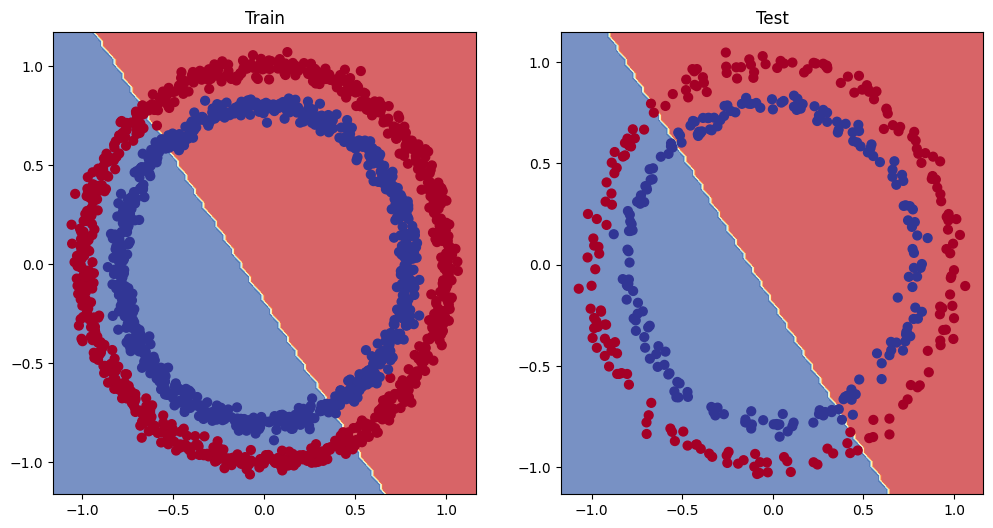

In [30]:
# Plotting decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

if the model goes underfitting then there is the need to improve the model

will be dealing with Improving the model in the nxt session!!!!! Thank you